# Measured v.s comanded time differance

## Imports

In [51]:
#supresses Pandas warning
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
from scipy.optimize import curve_fit

## Data

In [52]:
measured_vel = [0, 0, 0, 0.144698, 0.35717, 0.640217, 0.772591, 0.811426, 0.881441, 0.931292, 0.946042, 0.909821, 0.876587, 0.844847, 0.785661, 0.713219, 0.620612, 0.529313, 0.435026, 0.335885, 0.168409, 0.0929798, 0.0535848, 0.0281927, -0.0692681, -0.160568, -0.28286, -0.397311, -0.503174, -0.599141, -0.679798, -0.75056, -0.818521, -0.870052, -0.915049, -0.951643, -0.975728, -0.994586, -1.00019, -1.00056, -0.988238, -0.962099, -0.92345, -0.885922, -0.846341, -0.795743, -0.726475, -0.643764, -0.556012, -0.462845, -0.367625, -0.207058, -0.104742, -0.0427558, -0.0207244, 0.0522778, 0.129014, 0.234317, 0.348581, 0.460418, 0.558813, 0.644884, 0.719567, 0.787901, 0.850448, 0.901979, 0.938013, 0.96994, 0.988798, 1.00149, 1.00411, 0.997573, 0.973301, 0.93652, 0.900859, 0.865571, 0.823189, 0.761949, 0.685586, 0.598208, 0.505788, 0.415049, 0.317401, 0.159074, 0.0772965, 0.045183, 0.0274459, -0.0644137, -0.165422, -0.273712, -0.394511, -0.510829, -0.612771, -0.698096, -0.767177, -0.829164, -0.879388, -0.925878, -0.960792, -0.986184, -1.00075, -1.00392, -1.00056, -0.982263, -0.953697, -0.916916, -0.882935, -0.847087, -0.787901, -0.713779, -0.632188, -0.542009, -0.447535, -0.349141, -0.162248, -0.0737491, -0.0347274, -0.0162435, 0.0265123, 0.121919, 0.236184, 0.359783, 0.474048, 0.579164, 0.662808, 0.743279, 0.806199, 0.859783, 0.910007, 0.945295, 0.975168, 0.995146, 1.00784, 1.00541, 0.993092, 0.969193, 0.934093, 0.897872, 0.865945, 0.816841, 0.749627, 0.669903, 0.581031, 0.486557, 0.394698, 0.297797, 0.175504, 0.0722554, 0.0379014, 0.0194175, -0.0168036, -0.0323002, -0.0787901, -0.0774832, -0.127707, -0.434839, -0.566094, -0.689134, -0.811987, -0.92289, -1.00355, -1.04798, -1.07226, -1.08066, -1.07767, -1.06516, -1.04164, -1.0056, -0.974421, -0.935773, -0.885176, -0.817028, -0.73469, -0.648992, -0.5618, -0.469007, -0.373786, -0.177931, -0.0847647, -0.043876, -0.0199776, 0, -0.0369679, -0.0397685, 0, 0.0143764, 0.424944, 0.568335, 0.649925, 0.752987, 0.850635, 0.944922, 1.0127, 1.06049, 1.08327, 1.0885, 1.07674, 1.05713, 1.02521, 0.994212, 0.963032, 0.918223, 0.854929, 0.78006, 0.692681, 0.603622, 0.51587, 0.426624, 0.321135, 0.15814, 0.0821509, 0.0504108, 0.0276326, -0.0927931, -0.194922, -0.320762, -0.441748, -0.550224, -0.640963, -0.719567, -0.787341, -0.843167, -0.894884, -0.934093, -0.965833]
cmd_vel = [0.919581, 0.954308, 0.979346, 0.994645, 0.999993, 0.995373, 0.980819, 0.956259, 0.922289, 0.879096, 0.827135, 0.766768, 0.698988, 0.624546, 0.543484, 0.457009, 0.365865, 0.271141, 0.173745, 0.074582, -0.0253339, -0.125042, -0.223519, -0.319705, -0.412672, -0.501519, -0.58538, -0.663402, -0.734829, -0.798855, -0.854895, -0.902985, -0.941198, -0.970051, -0.989443, -0.998987, -0.99851, -0.988076, -0.96777, -0.937256, -0.89841, -0.850104, -0.793297, -0.72843, -0.656566, -0.577973, -0.493614, -0.4029, -0.310886, -0.214549, -0.115985, -0.0150296, 0.0837467, 0.182734, 0.279986, 0.37574, 0.465185, 0.551183, 0.631695, 0.706044, 0.773119, 0.832597, 0.883726, 0.926606, 0.95931, 0.982683, 0.996271, 0.999907, 0.993557, 0.977269, 0.95123, 0.915667, 0.870971, 0.817569, 0.756356, 0.687344, 0.611385, 0.529323, 0.442008, 0.350243, 0.254973, 0.157186, 0.0576671, -0.0425383, -0.141687, -0.239823, -0.335547, -0.42791, -0.51599, -0.598996, -0.675894, -0.747367, -0.808912, -0.863504, -0.909538, -0.946975, -0.973993, -0.991739, -0.99959, -0.997437, -0.985348, -0.963403, -0.931824, -0.890373, -0.841105, -0.782879, -0.716933, -0.64374, -0.56417, -0.478906, -0.388809, -0.294818, -0.198111, -0.09921, 0.000600252, 0.100471, 0.199255, 0.296085, 0.389967, 0.479954, 0.56515, 0.644676, 0.71778, 0.783694, 0.841797, 0.891479, 0.932254, 0.963786, 0.985551, 0.997542, 0.999556, 0.991579, 0.973718, 0.94601, 0.909056, 0.86292, 0.808144, 0.745035, 0.67505, 0.596775, 0.51463, 0.426854, 0.334243, 0.238182, 0.140529, 0.0406604, -0.0589665, -0.158317, -0.256109, -0.351435, -0.443413, -0.531497, -0.61282, -0.68867, -0.757613, -0.818999, -0.872176, -0.916451, -0.951786, -0.977656, -0.99376, -0.99993, -0.996089, -0.982322, -0.958755, -0.925591, -0.88317, -0.83173, -0.772378, -0.705114, -0.630805, -0.550155, -0.464058, -0.373317, -0.278836, -0.180472, -0.0823859, 0.017419, 0.117164, 0.215749, 0.312128, 0.405401, 0.494661, 0.578957, 0.657443, 0.729389, 0.794076, 0.851397, 0.899253, 0.938429, 0.968232, 0.988354, 0.998608, 0.998884, 0.98918, 0.969591, 0.940317, 0.901647, 0.854156, 0.798037, 0.733912, 0.662486, 0.584412, 0.50042, 0.411552, 0.318527, 0.222277, 0.123191, 0.0240308, -0.0757658, -0.174943, -0.272379, -0.367055, -0.45813, -0.544535, -0.625567, -0.700289, -0.768053, -0.828159, -0.87999, -0.922997, -0.956802, -0.981048, -0.995495, -0.999988]
time = [150, 201, 251, 301, 350, 400, 450, 501, 551, 601, 651, 701, 751, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1701, 1751, 1800, 1850, 1901, 1950, 2000, 2050, 2101, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2501, 2550, 2600, 2650, 2701, 2750, 2800, 2850, 2901, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3301, 3351, 3401, 3451, 3501, 3551, 3601, 3651, 3701, 3751, 3801, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4301, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4701, 4750, 4800, 4850, 4901, 4950, 5000, 5050, 5101, 5150, 5200, 5250, 5301, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000, 6050, 6100, 6150, 6200, 6250, 6300, 6350, 6400, 6450, 6501, 6550, 6600, 6650, 6700, 6750, 6801, 6850, 6900, 6950, 7001, 7050, 7101, 7151, 7200, 7250, 7301, 7350, 7401, 7450, 7500, 7550, 7600, 7651, 7701, 7751, 7801, 7851, 7901, 7951, 8000, 8050, 8100, 8150, 8200, 8251, 8300, 8350, 8400, 8450, 8501, 8550, 8600, 8650, 8700, 8750, 8800, 8850, 8901, 8950, 9000, 9050, 9100, 9150, 9200, 9250, 9300, 9350, 9400, 9450, 9501, 9551, 9601, 9651, 9701, 9751, 9801, 9851, 9901, 9951, 10001, 10051, 10100, 10150, 10200, 10250, 10300, 10350, 10400, 10450, 10501, 10550, 10600, 10650, 10700, 10750, 10800, 10850, 10900, 10950, 11000, 11050, 11100, 11150, 11200, 11250, 11300, 11350]
    # shift all time values to start from 0
time = [t - time[0] for t in time]
time = time[20:]
measured_vel = measured_vel[20:]
cmd_vel = cmd_vel[20:]


## Create DataFrame

In [53]:
df= pd.DataFrame({"time": time, "measured_vel": measured_vel, 
                  "cmd_vel":cmd_vel})

#TODO: if data is the same as the most recent save don't create a new file
df.to_json("./vel_" + datetime.now().strftime("%m-%d-%y_%H:%M:%S") + 
           ".json")

In [54]:
print(df.head())

print('any nans? ' + str(df.isna().values.any()))

   time  measured_vel   cmd_vel
0  1000      0.168409 -0.025334
1  1050      0.092980 -0.125042
2  1100      0.053585 -0.223519
3  1150      0.028193 -0.319705
4  1200     -0.069268 -0.412672
any nans? False


## Plot Raw Values

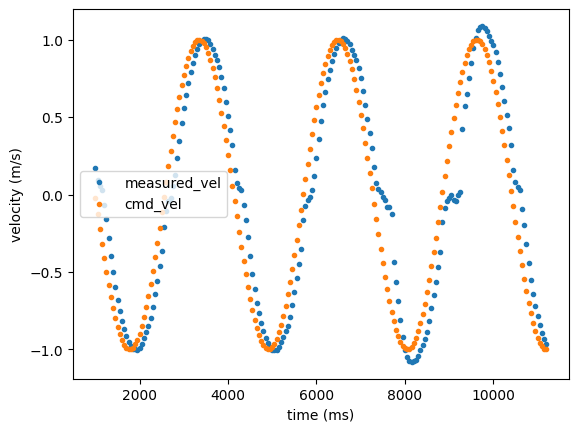

In [55]:
df.head()
df.plot(x="time", y=["measured_vel", "cmd_vel"], marker='.', 
        linestyle='none')
plt.legend()
plt.xlabel("time (ms)")
plt.ylabel("velocity (m/s)")
plt.show()

## Find Function values

In [64]:

def sin_func(x, a, b, c, d):
    return a * np.sin(b * x + c) + d
    
def get_sin_vals(func, x, y, guess):

    popt, pcov = curve_fit(func, x, y, p0=guess)
    # popt contains the best fit parameters a, b, c, d
    a, b, c, d = popt

    print(str(y.name))
    print(f'a:{a:.2e}, b:{b:.2e}, c:{c:.2e}, d:{d:.2e}')
    print(f'Estimate = {a:.2e} * sin({b:.2e}x + {c:.2e}) + {d:.2e} \n')
    return a,b,c,d
    


In [70]:

# initial guess for a, b, c, d
guess = [1, 2e-3, 1, 1]

# curve fitting
a, meas_freq, meas_phase, d = get_sin_vals(sin_func, df['time'], df['measured_vel'], guess)
df['measured_vel_fit'] = sin_func(df['time'], a, meas_freq, meas_phase, d)

a, cmd_freq, cmd_phase, d = get_sin_vals(sin_func, df['time'], df['cmd_vel'], guess)
df['cmd_vel_fit'] = sin_func(df['time'], a, cmd_freq, cmd_phase, d)

freq_avg = np.average([meas_freq, cmd_freq])
phase_diff =  (cmd_phase - meas_phase)/(2*np.pi* freq_avg)
print(f'Phase Difference {phase_diff:.1f}ms')

measured_vel
a:1.00e+00, b:1.99e-03, c:9.05e-01, d:-7.80e-04
Estimate = 1.00e+00 * sin(1.99e-03x + 9.05e-01) + -7.80e-04 

cmd_vel
a:1.00e+00, b:2.00e-03, c:1.17e+00, d:6.12e-05
Estimate = 1.00e+00 * sin(2.00e-03x + 1.17e+00) + 6.12e-05 

Phase Difference 20.9ms


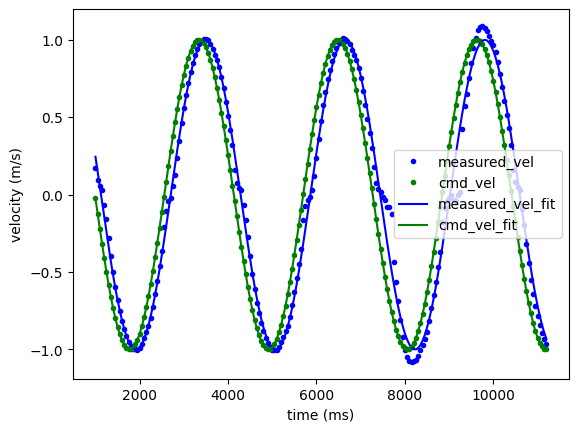

In [80]:
df.plot(x="time", y=["measured_vel", "cmd_vel"], marker='.', 
        linestyle='none', color=['b','g'])
ax = plt.gca()

df.plot(x="time", y=["measured_vel_fit", "cmd_vel_fit"], ax =ax, color=['b','g'])
plt.legend()
plt.xlabel("time (ms)")
plt.ylabel("velocity (m/s)")
plt.show()